Notebook 1, Stochastic Dynamical Modeling 31-1-2025 EM scheme

In [11]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt

gamma=2; mu=1; Xzero=1
T=1; N=2**10; dt = float(T)/N
t=np.linspace(0,T,N+1)


In [12]:
# Wiener process and True solution 

dW=np.sqrt(dt)*np.random.randn(1,N)
W=np.cumsum(dW)

Xtrue=Xzero*np.exp((gamma-0.5*mu**2)*t[1:]+mu*W); Xtrue=np.insert(Xtrue,0,Xzero)   

Error at endpoint:  0.45384301605341903


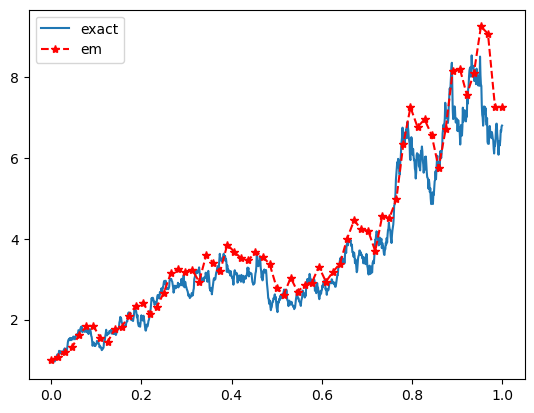

In [13]:
# EM scheme with different time steps 

def xrange(x):
    return iter(range(x))
    
R=16; Dt=R*dt; L=float(N)/R
Xem=np.zeros(int(L)+1); Xem[0] = Xzero

for j in xrange(int(L)):
    Winc=np.sum(dW[0][range(R*(j-1),R*j)])
    Xem[j+1] = Xem[j] + Dt*gamma*Xem[j] + mu*Xem[j]*Winc

emerr=np.abs(Xem[-1]-Xtrue[-1])
print("Error at endpoint: ", emerr)

ax=plt.subplot(111)
ax.plot(t,Xtrue)
ax.plot(np.linspace(0,T,int(L)+1),Xem,'r--*')
ax.legend(("exact","em"),loc=2)
plt.show()